<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/DowNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 484 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [4]:
var1 = yf.Ticker('AAPL')

In [5]:
apple = var1.institutional_holders


In [6]:
apple['comp'] = var1.ticker

In [7]:
var2 = yf.Ticker('MSFT')

In [8]:
msft = var2.institutional_holders

In [9]:
msft['comp'] = var2.ticker

In [10]:
tog_ = pd.concat([apple, msft])

In [11]:
tog_

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",1269995750,2022-03-30,0.0790,209904896009,AAPL
1,Blackrock Inc.,1027632887,2022-03-30,0.0639,169847162308,AAPL
2,"Berkshire Hathaway, Inc",890923410,2022-03-30,0.0554,147251820117,AAPL
3,State Street Corporation,613852274,2022-03-30,0.0382,101457503097,AAPL
4,"FMR, LLC",351584762,2022-03-30,0.0219,58109929034,AAPL
5,"Geode Capital Management, LLC",272081668,2022-03-30,0.0169,44969657754,AAPL
6,Price (T.Rowe) Associates Inc,233079365,2022-03-30,0.0145,38523357162,AAPL
7,Northern Trust Corporation,186031985,2022-03-30,0.0116,30747366253,AAPL
8,Bank of America Corporation,144401747,2022-03-30,0.0090,23866720567,AAPL
9,Norges Bank Investment Management,142076403,2021-12-30,0.0088,23482387714,AAPL


In [12]:
G = nx.from_pandas_edgelist(tog_, 'Holder', 'comp')

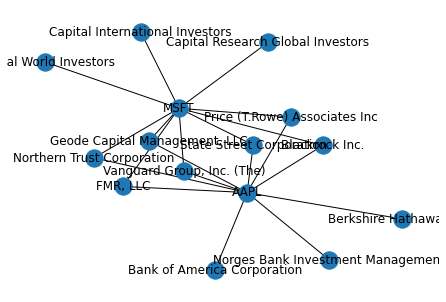

In [13]:
nx.draw(G, with_labels=True)

In [14]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [15]:
tickers = tickers.Symbol.to_list()

In [16]:
frames = []

for ticker in tickers:
  var = yf.Ticker(ticker)
  frame = var.institutional_holders
  frame['comp'] = var.ticker
  frames.append(frame)

In [17]:
all_tog = pd.concat(frames)

In [18]:
all_tog

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",47299775,2022-03-30,0.0830,6945262779,MMM
1,Blackrock Inc.,42996030,2022-03-30,0.0755,6313322353,MMM
2,State Street Corporation,32590721,2022-03-30,0.0572,4785458736,MMM
3,"Charles Schwab Investment Management, Inc.",11315417,2022-03-30,0.0199,1661499331,MMM
4,"Geode Capital Management, LLC",11157042,2022-03-30,0.0196,1638244336,MMM
...,...,...,...,...,...,...
5,Price (T.Rowe) Associates Inc,22234051,2022-03-30,0.0081,3311094874,WMT
6,Norges Bank Investment Management,20221520,2021-12-30,0.0074,2925851728,WMT
7,Northern Trust Corporation,16190712,2022-03-30,0.0059,2411120831,WMT
8,GQG Partners LLC,15431684,2022-03-30,0.0056,2298086381,WMT


In [19]:
G = nx.from_pandas_edgelist(all_tog, 'Holder', 'comp', edge_attr=True)

In [20]:
edgelist = nx.to_edgelist(G)

In [21]:
colors = []
for node in G: 
  if node in all_tog['comp'].values: 
    colors.append("red")
  else: 
    colors.append("yellow")


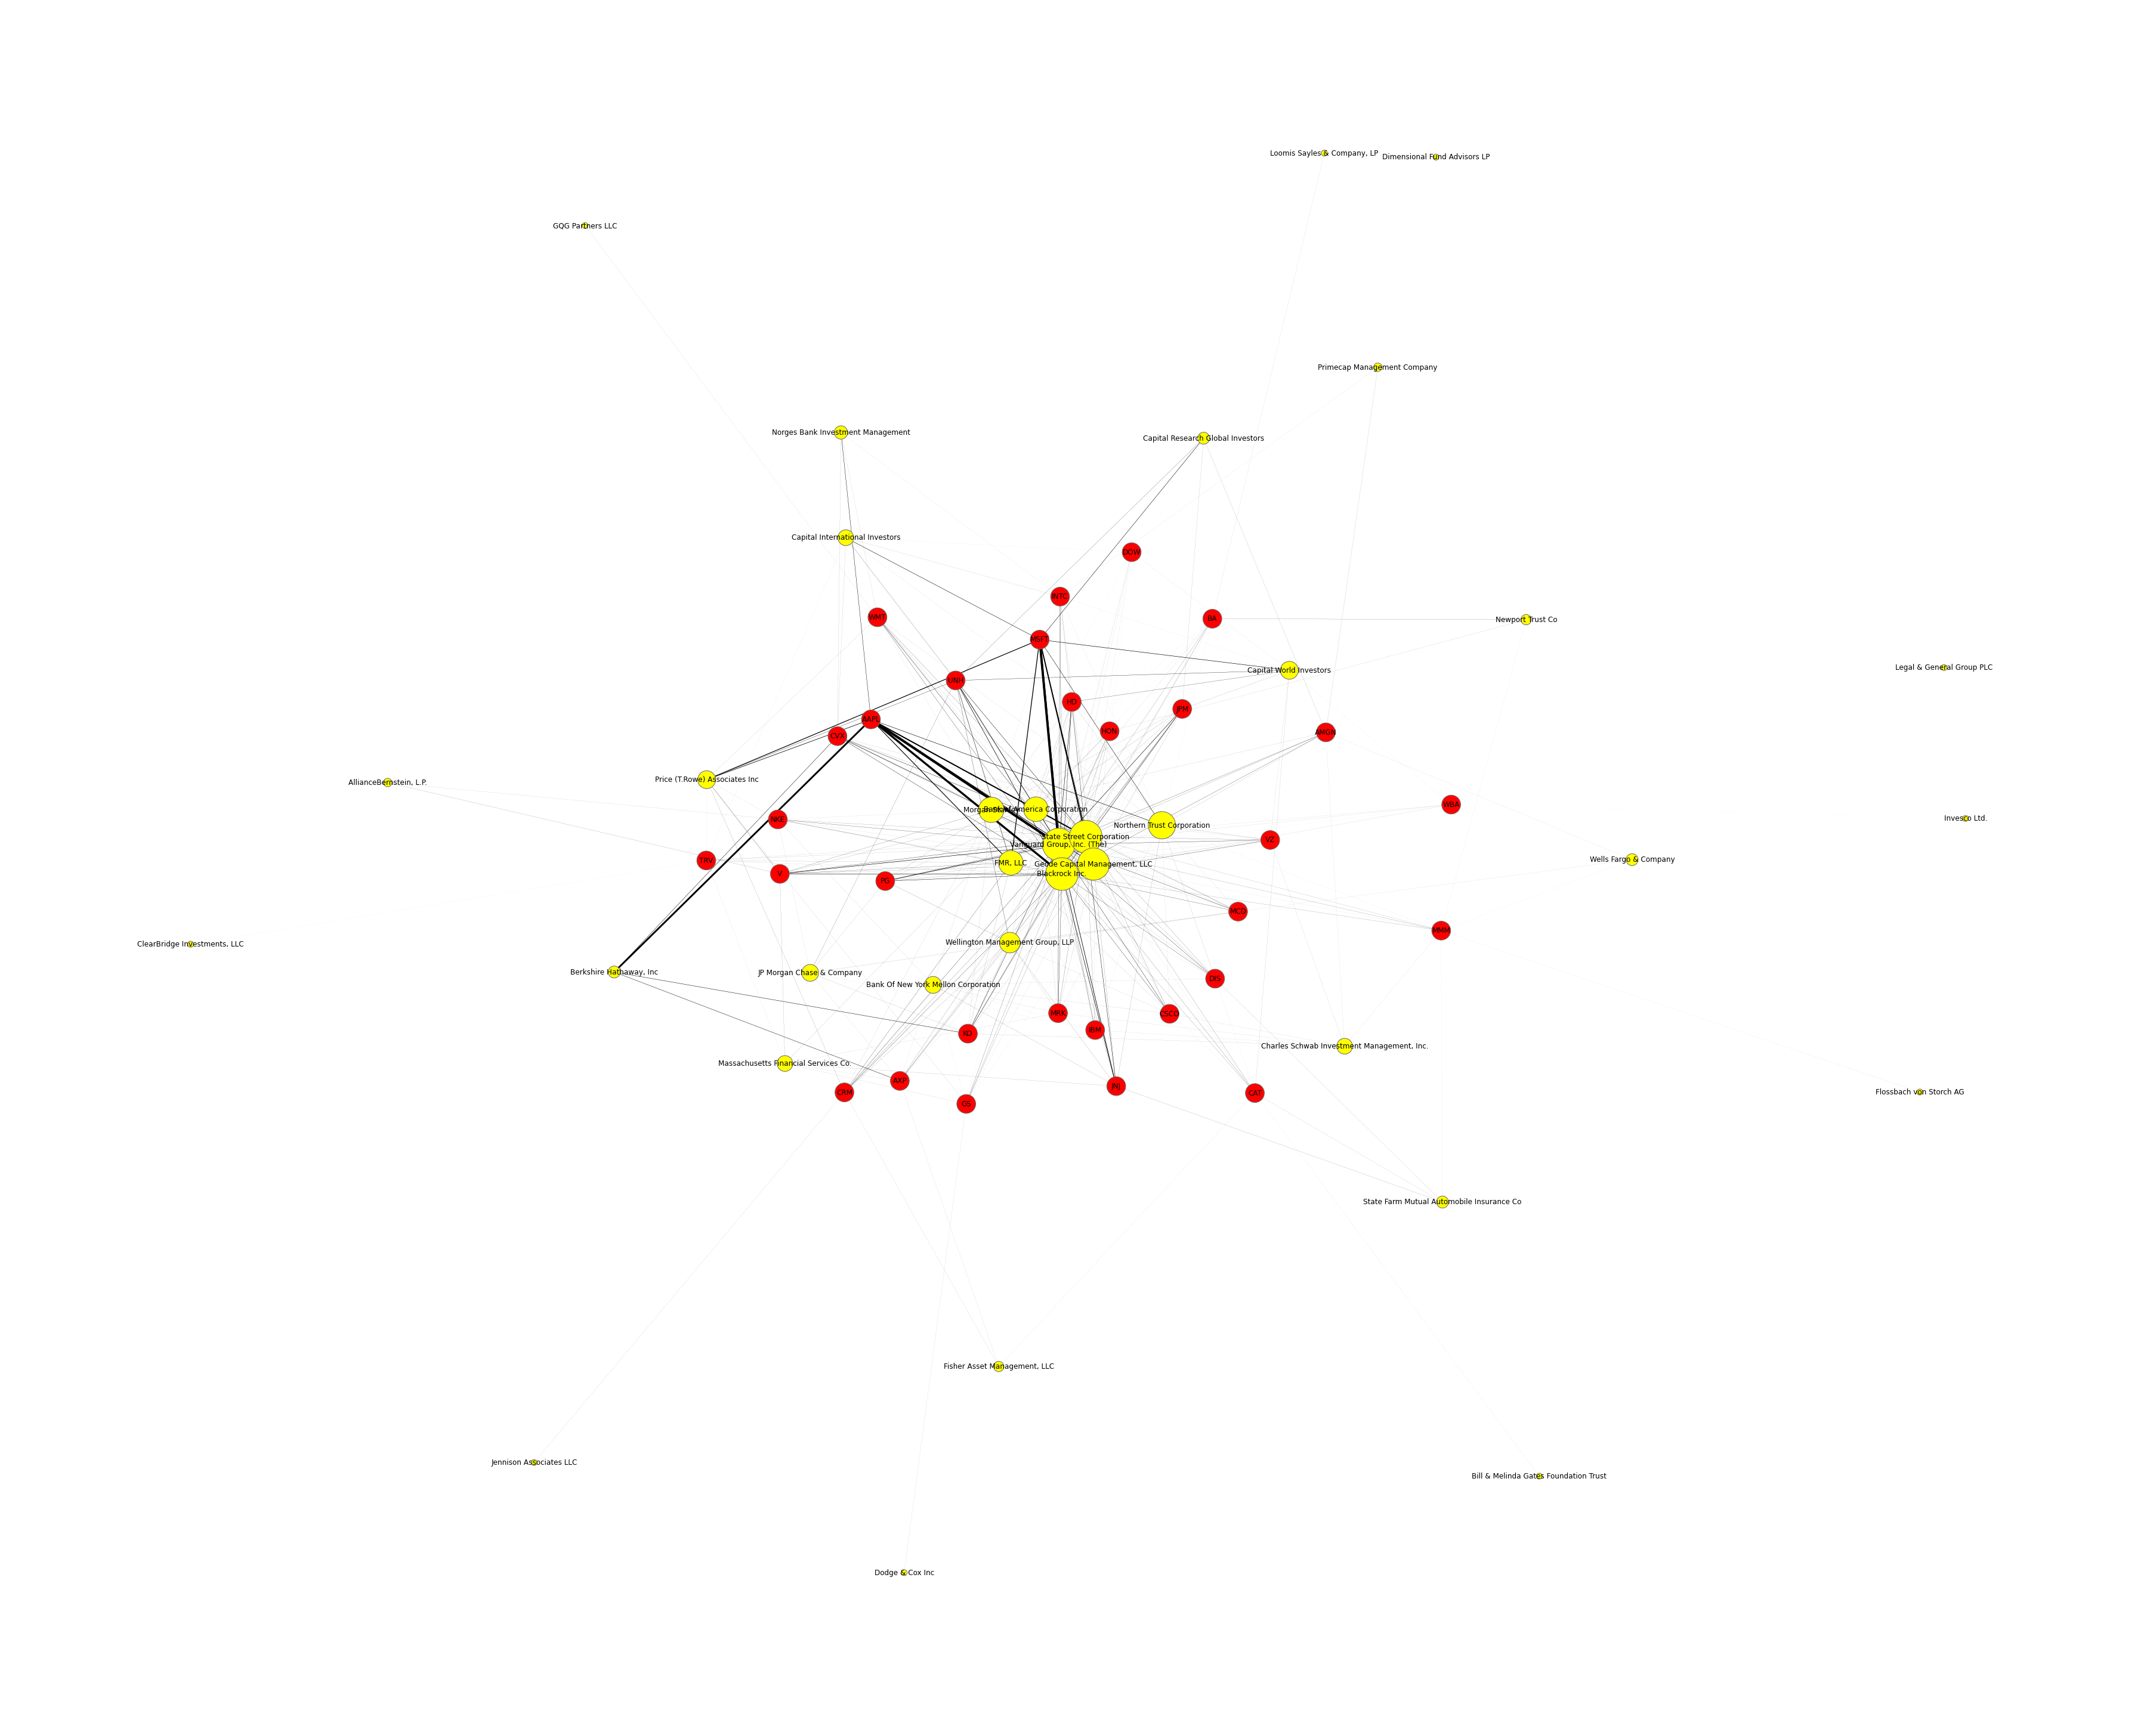

In [23]:
plt.figure(figsize=(50,40))
nx.draw(G, with_labels=True,
        node_color=colors,
        node_size=[v * 100 for v in dict(G.degree()).values()],
                   width = [v[2]['Value']/50_000_000_000 for v in edgelist])
ax = plt.gca()
ax.collections[0].set_edgecolor("#696969")